In [81]:
import pandas as pd
import seaborn as sns

In [117]:
med = pd.read_csv("../../data/raw/medical_expense.csv")
income = pd.read_csv("../../data/raw/adult_income.csv")
med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:xlabel='smoker', ylabel='charges'>

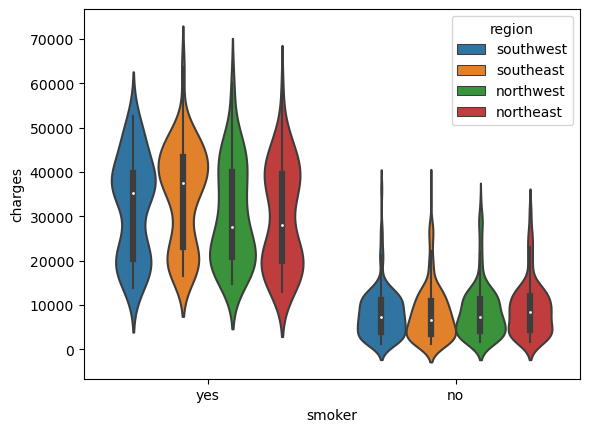

In [119]:
sns.violinplot(med, x='smoker', y='charges', hue='region')

In [25]:
income2 = (income.drop(['workclass', 'fnlwgt', 'capital.gain', 'capital.loss', 'education', 'marital.status', 'sex', 'race', 'relationship', 'native.country', 'income', 'occupation'], axis=1)
.groupby(income['age'], as_index=False)
.mean())
income2

,age,education.num,hours.per.week
0,17.0,6.648101,21.367089
1,18.0,8.152727,25.912727
2,19.0,9.096910,30.678371
3,20.0,9.345286,32.280212
4,21.0,9.434722,34.034722
...,...,...,...
68,85.0,10.333333,29.333333
69,86.0,14.000000,40.000000
70,87.0,9.000000,2.000000
71,88.0,13.333333,40.000000


In [36]:
income2['education.num'] = round(income2['education.num'], 0)
income2.head()

,age,education.num,hours.per.week
0,17.0,7.0,21.367089
1,18.0,8.0,25.912727
2,19.0,9.0,30.678371
3,20.0,9.0,32.280212
4,21.0,9.0,34.034722


In [35]:
med2 = (med.drop(['sex','children','smoker','region'], axis=1)
.groupby(med['age'], as_index=False)
.mean())
med2.head()

,age,bmi,charges
0,18.0,31.326159,7086.217556
1,19.0,28.596912,9747.909335
2,20.0,30.632759,10159.697736
3,21.0,28.185714,4730.464330
4,22.0,31.087679,10012.932802


In [112]:
RQ11 = pd.merge(income2, med2, how='inner', on='age')
RQ11

,age,education.num,hours.per.week,smoker,charges
0,18.0,8.0,25.912727,no,1725.55230
1,18.0,8.0,25.912727,no,1137.01100
2,18.0,8.0,25.912727,no,2198.18985
3,18.0,8.0,25.912727,no,3393.35635
4,18.0,8.0,25.912727,no,2211.13075
...,...,...,...,...,...
1333,64.0,9.0,34.495192,no,16069.08475
1334,64.0,9.0,34.495192,yes,29330.98315
1335,64.0,9.0,34.495192,no,14394.55790
1336,64.0,9.0,34.495192,yes,49577.66240


<AxesSubplot:xlabel='education.num', ylabel='charges'>

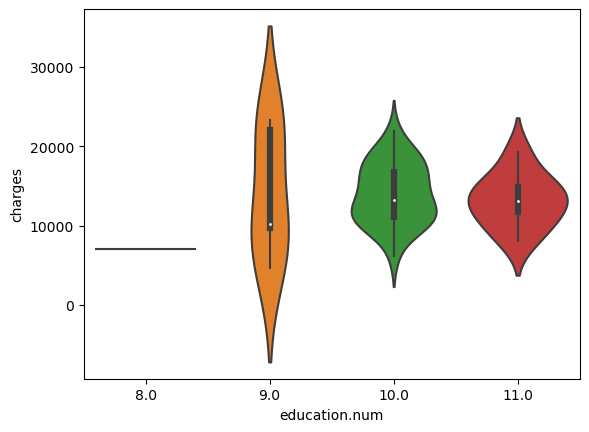

In [ ]:
sns.violinplot(RQ11, x='